### Import Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py

sns.set()

### Read Dataset

In [68]:
data = pd.read_csv('titanic_data.csv')

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Survival**	   - Surviva (0 = No, 1 = Yes)
* **Pclass**	   - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* **Sex**	       - Sex	
* **Age**	       - Age in years	
* **Sibsp**	       - Number of siblings / spouses aboard the Titanic	
* **Parch**	       - Number of parents / children aboard the Titanic	
* **Ticket**	   - Ticket number	
* **Fare**	       - Passenger fare	
* **Cabin**	       - Cabin number	
* **Embarked**	   - Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

In [70]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data Preprocessing 

##### Handling missing values

In [71]:
data.isnull().sum()
#data.isnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
data.drop('Cabin', axis=1, inplace=True)
#data.head()

In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(data['Age'].values.reshape(-1,1))  
data['Age'] = imputer.transform(data['Age'].values.reshape(-1,1))

In [74]:
data = data.dropna()

In [75]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Handling categorical variables

In [76]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [77]:
data.select_dtypes(include=['object']).nunique()

Name        889
Sex           2
Ticket      680
Embarked      3
dtype: int64

In [78]:
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [79]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


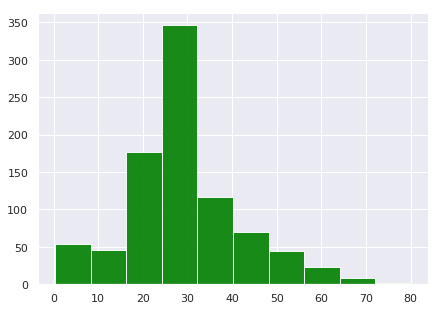

In [80]:
data['Age'].hist(figsize=(7,5), color='green', alpha=0.9)

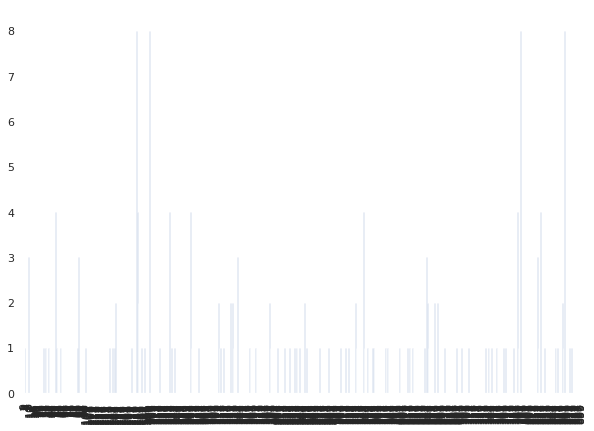

In [81]:
data['SibSp'].plot(kind='bar', alpha=0.5, figsize=(10,7))

In [82]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [83]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Feature Selection

In [84]:
yy = data.corr()['Age']
x=data.corr()['Survived']

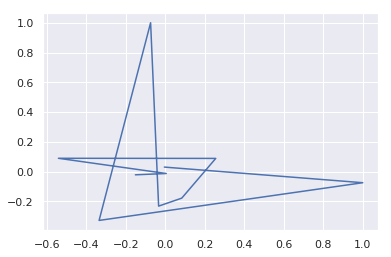

In [85]:
plt.plot(x,yy)

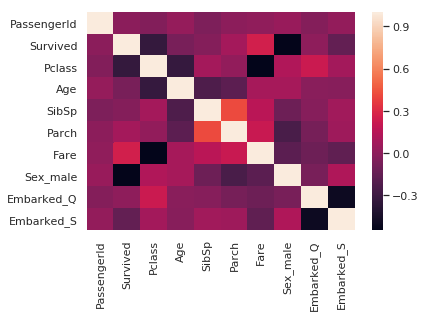

In [86]:
sns.heatmap(data.corr())

In [87]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [88]:
#feature_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

feature_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_S']

In [89]:
%matplotlib inline

In [90]:
X = data[feature_columns]
y = data['Survived']


In [91]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [92]:
#import visuals as vs

In [93]:
x = data['Survived']
data.head()

#plt.plot(X,y)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [94]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression

##### Model Building

In [96]:
from sklearn import linear_model

model = linear_model.LogisticRegression(multi_class='auto')

In [97]:
model.fit(X_train, y_train)

/home/oum/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

##### Model Evaluation

In [98]:
train_accuracy = model.score(X_train, y_train)
print('Train-set accuracy \t: ', train_accuracy)

test_accuracy = model.score(X_test, y_test)
print('Test-set accuracy \t: ', test_accuracy)

Train-set accuracy 	:  0.7949579831932773
Test-set accuracy 	:  0.7993197278911565


In [99]:
pred=model.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))

[[157  27]
 [ 32  78]]


In [101]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       184
           1       0.74      0.71      0.73       110

   micro avg       0.80      0.80      0.80       294
   macro avg       0.79      0.78      0.78       294
weighted avg       0.80      0.80      0.80       294



#                                         Thank You !!!